In [1]:
!pip install cartopy matplotlib pygplates ipywidgets jupyterlab_widgets


You should consider upgrading via the 'C:\Users\acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Reconstructed 1106 features at 200 Ma
Feature 0 Plate ID: 503
Feature 1 Plate ID: 5031
Feature 2 Plate ID: 5032
Feature 3 Plate ID: 715
Feature 4 Plate ID: 6021
Feature 5 Plate ID: 602
Feature 6 Plate ID: 77144
Feature 7 Plate ID: 760
Feature 8 Plate ID: 701
Feature 9 Plate ID: 206
Time 0 Ma -> rotated point for plate 701: (0.0, 0.0)
Time 100 Ma -> rotated point for plate 701: (0.0, 0.0)
Time 200 Ma -> rotated point for plate 701: (0.0, 0.0)
India-Middle East aCOB 503
ANS aCOB 5031
Azania aCOB 5032
SM 715
Yangtze 6021
Cathasyia aCOB 602
Hoggar 77144
Nigeria-Benin 760
Congo 701
SF 206
WAC 714
Australia aCOB 801
Siberia aCOB 401
Tarim aCOB 580
North China aCOB 601
North Australia aCOB 8011
Laurentia aCOB 101
Baltica aCOB 302
Kalahari 77030
Amazonia aCOB 201
True


AttributeError: 'PolygonOnSphere' object has no attribute 'get_geometry_type'

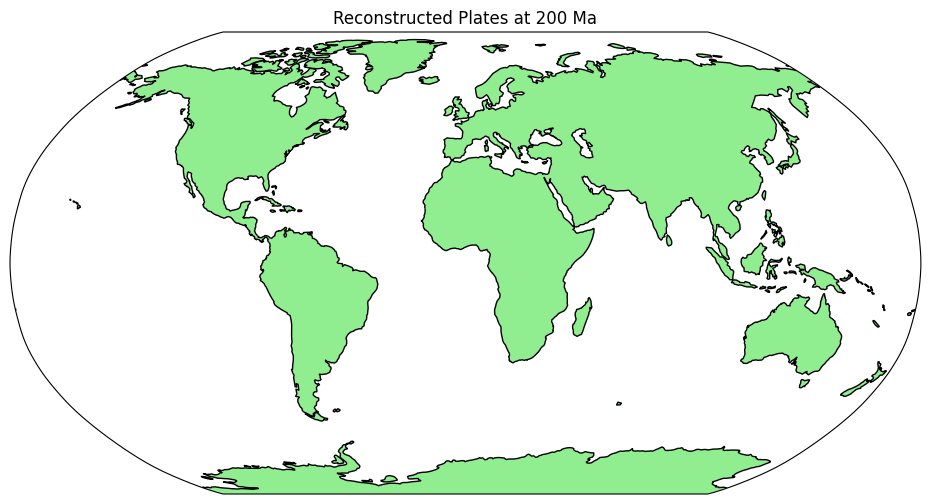

In [20]:
import pygplates

# Define the paths to your data files
rotation_model_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/optimisation/1000_0_rotfile_Merdith_et_al_optimised.rot'
features_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/COB_polygons_and_coastlines_combined_1000_0_Merdith_etal.gpml'

# Load the rotation model
rotation_model = pygplates.RotationModel(rotation_model_path)

# Load the feature collection
features = pygplates.FeatureCollection(features_path)

# Reconstruct the features at a specific geological time (e.g., 100 million years ago)
reconstruction_time = 200
reconstructed_geometries = []
pygplates.reconstruct(features, rotation_model, reconstructed_geometries, reconstruction_time)

# Output the number of reconstructed geometries
print(f"Reconstructed {len(reconstructed_geometries)} features at {reconstruction_time} Ma")

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up a map projection
projection = ccrs.Robinson()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_title(f"Reconstructed Plates at {reconstruction_time} Ma")
ax.add_feature(cfeature.LAND, facecolor='lightgreen')
ax.coastlines()

# Debug tests
#for feature in features:
#    plate_id = feature.get_reconstruction_plate_id()
#    print(f'Plate ID: {plate_id}')
from itertools import islice

for i, feature in enumerate(islice(features, 10)):
    print(f"Feature {i} Plate ID: {feature.get_reconstruction_plate_id()}")

# Pick a non-zero plate ID from your earlier printout
plate_id = 701  # Example — replace with actual plate ID from your features
lat, lon = 0, 0  # Reference position (can be anything)

for time in [0, 100, 200]:
    rotation = rotation_model.get_rotation(plate_id, time)
    rotated_point = rotation * pygplates.PointOnSphere(lat, lon)
    print(f"Time {time} Ma -> rotated point for plate {plate_id}: {rotated_point.to_lat_lon()}")

for feature in list(features)[:20]:
    print(feature.get_name(), feature.get_reconstruction_plate_id())

with open(rotation_model_path) as f:
    content = f.read()
    print("701" in content)  # Or other plate IDs



# Plot each reconstructed geometry
for geometry in reconstructed_geometries:
    reconstructed_geom = geometry.get_reconstructed_geometry()
    if reconstructed_geom.get_geometry_type() == pygplates.GeometryOnSphereType.Polygon:
        lat_lon_list = reconstructed_geom.to_lat_lon_list()
        lats, lons = zip(*lat_lon_list)
        ax.plot(lons, lats, '-', color='red', transform=ccrs.Geodetic(), linewidth=0.5)

plt.show()


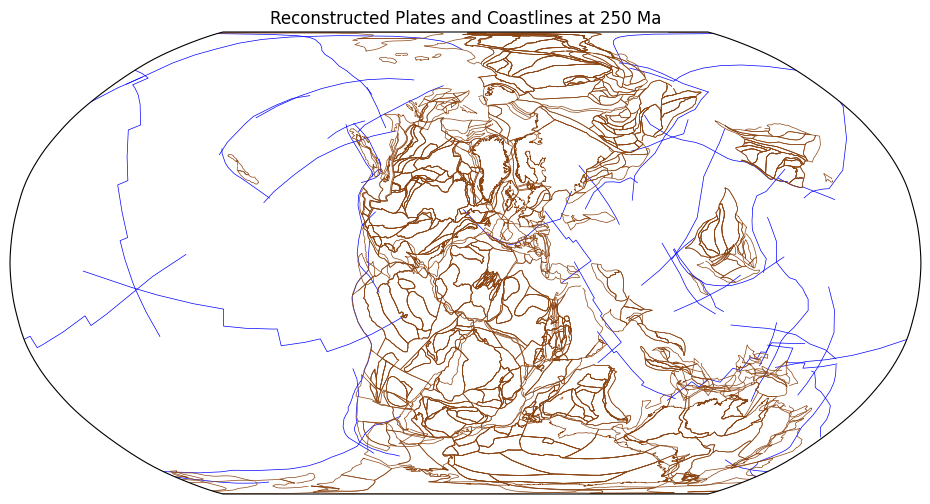

In [43]:
import pygplates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_reconstructed_features(ax, reconstructed_geometries, color_map):
    """
    Plot reconstructed geometries on the given Cartopy axis.

    Parameters:
    - ax: matplotlib axis with Cartopy projection
    - reconstructed_geometries: list of reconstructed geometries
    - color_map: dict mapping geometry types to colors (e.g., {'polygon': 'red', 'polyline': 'blue'})
    """
    for reconstructed_feature_geom in reconstructed_geometries:
        geom = reconstructed_feature_geom.get_reconstructed_geometry()

        if isinstance(geom, pygplates.PolygonOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            lats, lons = zip(*lat_lon_list)
            ax.plot(lons, lats, '-', color=color_map.get('polygon', 'black'),
                    transform=ccrs.Geodetic(), linewidth=0.5)

        elif isinstance(geom, pygplates.PolylineOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            lats, lons = zip(*lat_lon_list)
            ax.plot(lons, lats, '-', color=color_map.get('polyline', 'black'),
                    transform=ccrs.Geodetic(), linewidth=0.5)

# Load input data
plate_boundaries_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/250-0_plate_boundaries.gpml'
rotation_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/1000_0_rotfile.rot'
coastlines_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/COB_polygons_and_coastlines_combined_1000_0_Merdith_etal.gpml'

features = pygplates.FeatureCollection(plate_boundaries_path)
coastline_features = pygplates.FeatureCollection(coastlines_path)
rotation_model = pygplates.RotationModel(rotation_path)

# Reconstruct features at 250 Ma
reconstruction_time = 250
reconstructed_boundaries = []
reconstructed_coastlines = []

pygplates.reconstruct(features, rotation_model, reconstructed_boundaries, reconstruction_time)
pygplates.reconstruct(coastline_features, rotation_model, reconstructed_coastlines, reconstruction_time)

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_title(f"Reconstructed Plates and Coastlines at {reconstruction_time} Ma")

plot_reconstructed_features(ax, reconstructed_boundaries, color_map={'polygon': 'red', 'polyline': 'blue'})
plot_reconstructed_features(ax, reconstructed_coastlines, color_map={'polygon': 'saddlebrown', 'polyline': 'saddlebrown'})

plt.show()


In [44]:
import pygplates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_reconstructed_features(ax, reconstructed_geometries, color_map):
    """
    Plot reconstructed geometries on the given Cartopy axis.

    Parameters:
    - ax: matplotlib axis with Cartopy projection
    - reconstructed_geometries: list of reconstructed geometries
    - color_map: dict mapping geometry types to colors (e.g., {'polygon': 'red', 'polyline': 'blue'})
    """
    for reconstructed_feature_geom in reconstructed_geometries:
        geom = reconstructed_feature_geom.get_reconstructed_geometry()

        if isinstance(geom, pygplates.PolygonOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            lats, lons = zip(*lat_lon_list)
            ax.plot(lons, lats, '-', color=color_map.get('polygon', 'black'),
                    transform=ccrs.Geodetic(), linewidth=0.5)

        elif isinstance(geom, pygplates.PolylineOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            lats, lons = zip(*lat_lon_list)
            ax.plot(lons, lats, '-', color=color_map.get('polyline', 'black'),
                    transform=ccrs.Geodetic(), linewidth=0.5)

# Load input data
plate_boundaries_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/250-0_plate_boundaries.gpml'
rotation_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/1000_0_rotfile.rot'
coastlines_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022/COB_polygons_and_coastlines_combined_1000_0_Merdith_etal.gpml'

features = pygplates.FeatureCollection(plate_boundaries_path)
coastline_features = pygplates.FeatureCollection(coastlines_path)
rotation_model = pygplates.RotationModel(rotation_path)

# Reconstruct features at 250 Ma
reconstruction_time = 250
reconstructed_boundaries = []
reconstructed_coastlines = []

pygplates.reconstruct(features, rotation_model, reconstructed_boundaries, reconstruction_time)
pygplates.reconstruct(coastline_features, rotation_model, reconstructed_coastlines, reconstruction_time)

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_title(f"Reconstructed Plates and Coastlines at {reconstruction_time} Ma")

plot_reconstructed_features(ax, reconstructed_boundaries, color_map={'polygon': 'red', 'polyline': 'blue'})
plot_reconstructed_features(ax, reconstructed_coastlines, color_map={'polygon': 'saddlebrown', 'polyline': 'saddlebrown'})

plt.show()


TypeError: Expected an optional filename, or sequence of features, or a single feature

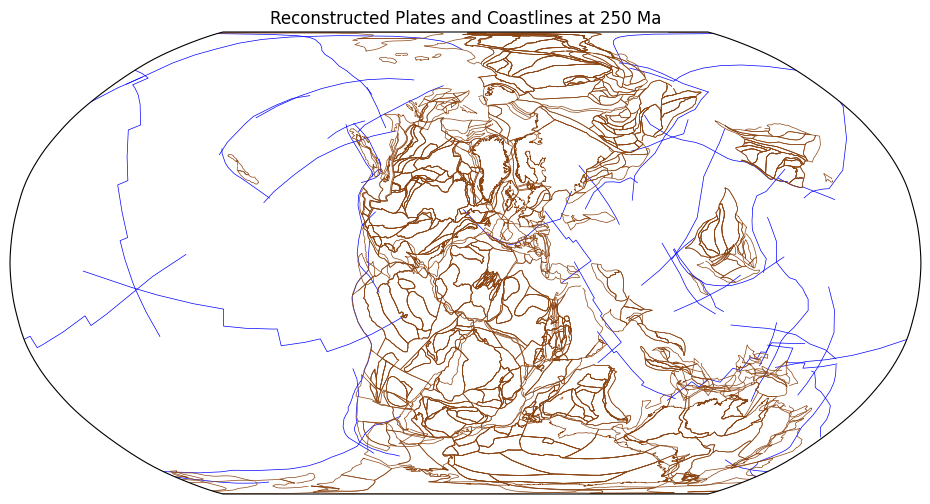

In [4]:
import pygplates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

def plot_reconstructed_features(ax, reconstructed_geometries, color_map):
    for reconstructed_feature_geom in reconstructed_geometries:
        geom = reconstructed_feature_geom.get_reconstructed_geometry()
        if isinstance(geom, pygplates.PolygonOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            if lat_lon_list:
                lats, lons = zip(*lat_lon_list)
                ax.plot(lons, lats, '-', color=color_map.get('polygon', 'black'),
                        transform=ccrs.Geodetic(), linewidth=0.5)
        elif isinstance(geom, pygplates.PolylineOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            if lat_lon_list:
                lats, lons = zip(*lat_lon_list)
                ax.plot(lons, lats, '-', color=color_map.get('polyline', 'black'),
                        transform=ccrs.Geodetic(), linewidth=0.5)

# === INPUT SETUP ===
reconstruction_time = 250  # Change this to any time between 0 and 1000 Ma

base_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022'
rotation_path = os.path.join(base_path, '1000_0_rotfile.rot')
coastlines_path = os.path.join(base_path, 'COB_polygons_and_coastlines_combined_1000_0_Merdith_etal.gpml')

# Choose plate boundary files based on reconstruction time
if reconstruction_time > 410:
    plate_boundaries_path = [
        os.path.join(base_path, '1000-410-Convergence.gpml'),
        os.path.join(base_path, '1000-410-Divergence.gpml'),
        os.path.join(base_path, '1000-410-Transforms.gpml'),
        os.path.join(base_path, '1000-410-Topologies.gpml')
    ]
elif 250 < reconstruction_time <= 410:
    plate_boundaries_path = [os.path.join(base_path, '410-250_plate_boundaries.gpml')]
else:
    plate_boundaries_path = [os.path.join(base_path, '250-0_plate_boundaries.gpml')]

# === LOAD DATA ===
if isinstance(plate_boundaries_path, list):
    features = []
    for path in plate_boundaries_path:
        features += pygplates.FeatureCollection(path)
else:
    features = pygplates.FeatureCollection(plate_boundaries_path)

coastline_features = pygplates.FeatureCollection(coastlines_path)
rotation_model = pygplates.RotationModel(rotation_path)

# === RECONSTRUCT ===
reconstructed_boundaries = []
reconstructed_coastlines = []
pygplates.reconstruct(features, rotation_model, reconstructed_boundaries, reconstruction_time)
pygplates.reconstruct(coastline_features, rotation_model, reconstructed_coastlines, reconstruction_time)

# === PLOT ===
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_title(f"Reconstructed Plates and Coastlines at {reconstruction_time} Ma")

plot_reconstructed_features(ax, reconstructed_boundaries, color_map={'polygon': 'red', 'polyline': 'blue'})
plot_reconstructed_features(ax, reconstructed_coastlines, color_map={'polygon': 'saddlebrown', 'polyline': 'saddlebrown'})

plt.show()


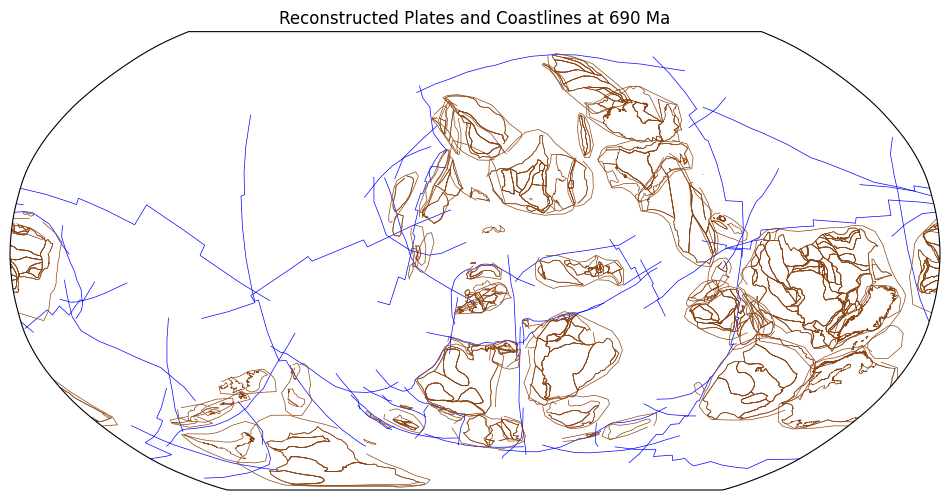

In [7]:
import pygplates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
from IPython.display import display, clear_output

# === INPUT SETUP ===
base_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022'
rotation_path = os.path.join(base_path, '1000_0_rotfile.rot')
coastlines_path = os.path.join(base_path, 'COB_polygons_and_coastlines_combined_1000_0_Merdith_etal.gpml')

rotation_model = pygplates.RotationModel(rotation_path)
coastline_features = pygplates.FeatureCollection(coastlines_path)

def get_plate_boundaries(reconstruction_time):
    if reconstruction_time > 410:
        paths = [
            os.path.join(base_path, '1000-410-Convergence.gpml'),
            os.path.join(base_path, '1000-410-Divergence.gpml'),
            os.path.join(base_path, '1000-410-Transforms.gpml'),
            os.path.join(base_path, '1000-410-Topologies.gpml')
        ]
    elif 250 < reconstruction_time <= 410:
        paths = [os.path.join(base_path, '410-250_plate_boundaries.gpml')]
    else:
        paths = [os.path.join(base_path, '250-0_plate_boundaries.gpml')]

    features = []
    for path in paths:
        features += pygplates.FeatureCollection(path)
    return features

def plot_reconstructed_features(ax, reconstructed_geometries, color_map):
    for reconstructed_feature_geom in reconstructed_geometries:
        geom = reconstructed_feature_geom.get_reconstructed_geometry()
        if isinstance(geom, pygplates.PolygonOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            if lat_lon_list:
                lats, lons = zip(*lat_lon_list)
                ax.plot(lons, lats, '-', color=color_map.get('polygon', 'black'),
                        transform=ccrs.Geodetic(), linewidth=0.5)
        elif isinstance(geom, pygplates.PolylineOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            if lat_lon_list:
                lats, lons = zip(*lat_lon_list)
                ax.plot(lons, lats, '-', color=color_map.get('polyline', 'black'),
                        transform=ccrs.Geodetic(), linewidth=0.5)

def update_plot(reconstruction_time):
    clear_output(wait=True)

    # Load features
    features = get_plate_boundaries(reconstruction_time)

    # Reconstruct geometries
    reconstructed_boundaries = []
    reconstructed_coastlines = []
    pygplates.reconstruct(features, rotation_model, reconstructed_boundaries, reconstruction_time)
    pygplates.reconstruct(coastline_features, rotation_model, reconstructed_coastlines, reconstruction_time)

    # Plot
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    ax.set_title(f"Reconstructed Plates and Coastlines at {reconstruction_time} Ma")

    plot_reconstructed_features(ax, reconstructed_boundaries, color_map={'polygon': 'red', 'polyline': 'blue'})
    plot_reconstructed_features(ax, reconstructed_coastlines, color_map={'polygon': 'saddlebrown', 'polyline': 'saddlebrown'})
    plt.show()

    # Re-display the slider
    #display(slider)

# === SLIDER WIDGET ===
#slider = IntSlider(value=560, min=0, max=1000, step=10, description='Time (Ma)', continuous_update=False)
#slider.observe(lambda change: update_plot(change['new']), names='value')
interact(update_plot, reconstruction_time=IntSlider(value=560, min=0, max=1000, step=10, description='Time (Ma)', continuous_update=False))

# Display everything
update_plot(slider.value)

In [9]:
import pygplates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
from ipywidgets import IntSlider, VBox, Output
from IPython.display import display

# === INPUT SETUP ===
base_path = 'GPlates 2.5.0/GeoData/FeatureCollections/AltPlateReconstructions/Muller_etal_2022'
rotation_path = os.path.join(base_path, '1000_0_rotfile.rot')
coastlines_path = os.path.join(base_path, 'COB_polygons_and_coastlines_combined_1000_0_Merdith_etal.gpml')

rotation_model = pygplates.RotationModel(rotation_path)
coastline_features = pygplates.FeatureCollection(coastlines_path)

def get_plate_boundaries(reconstruction_time):
    if reconstruction_time > 410:
        paths = [
            os.path.join(base_path, '1000-410-Convergence.gpml'),
            os.path.join(base_path, '1000-410-Divergence.gpml'),
            os.path.join(base_path, '1000-410-Transforms.gpml'),
            os.path.join(base_path, '1000-410-Topologies.gpml')
        ]
    elif 250 < reconstruction_time <= 410:
        paths = [os.path.join(base_path, '410-250_plate_boundaries.gpml')]
    else:
        paths = [os.path.join(base_path, '250-0_plate_boundaries.gpml')]

    features = []
    for path in paths:
        features += pygplates.FeatureCollection(path)
    return features

def plot_reconstructed_features(ax, reconstructed_geometries, color_map):
    for reconstructed_feature_geom in reconstructed_geometries:
        geom = reconstructed_feature_geom.get_reconstructed_geometry()
        if isinstance(geom, pygplates.PolygonOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            if lat_lon_list:
                lats, lons = zip(*lat_lon_list)
                ax.plot(lons, lats, '-', color=color_map.get('polygon', 'black'),
                        transform=ccrs.Geodetic(), linewidth=0.5)
        elif isinstance(geom, pygplates.PolylineOnSphere):
            lat_lon_list = geom.to_lat_lon_list()
            if lat_lon_list:
                lats, lons = zip(*lat_lon_list)
                ax.plot(lons, lats, '-', color=color_map.get('polyline', 'black'),
                        transform=ccrs.Geodetic(), linewidth=0.5)

# === Output area and slider ===
out = Output()
slider = IntSlider(value=500, min=0, max=1000, step=10, description='Time (Ma)', continuous_update=False)

def update_plot(change):
    with out:
        out.clear_output(wait=True)
        time = change['new']

        # Load features
        features = get_plate_boundaries(time)

        # Reconstruct geometries
        reconstructed_boundaries = []
        reconstructed_coastlines = []
        pygplates.reconstruct(features, rotation_model, reconstructed_boundaries, time)
        pygplates.reconstruct(coastline_features, rotation_model, reconstructed_coastlines, time)

        # Plot
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
        ax.set_title(f"Reconstructed Plates and Coastlines at {time} Ma")

        plot_reconstructed_features(ax, reconstructed_boundaries, color_map={'polygon': 'red', 'polyline': 'blue'})
        plot_reconstructed_features(ax, reconstructed_coastlines, color_map={'polygon': 'saddlebrown', 'polyline': 'saddlebrown'})
        plt.show()

slider.observe(update_plot, names='value')

# Initial display
display(VBox([slider, out]))
update_plot({'new': slider.value})
